# Red Wine Quality Prediction

In [322]:
##Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
import pickle

In [323]:
#getting the Data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [324]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [325]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [326]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset

In [327]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [328]:
df.describe()##describing the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Large standard deviations are present in "free sulfur oxide" , and "total sulfur oxide".This indicates the presence of Outliers

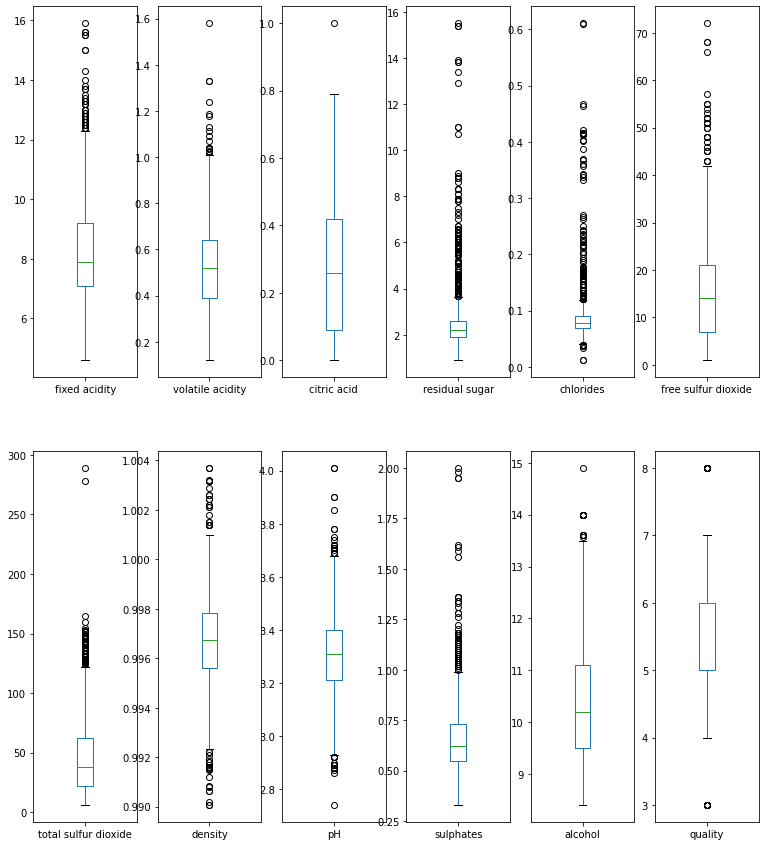

In [329]:
# CHECKING OUTLIERS
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(13,15))
plt.show()

In [330]:
#CHECKING THE UNIQUE VALUES IN QUALITY COLUMN
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

*Categorising the wine in two category normal(0)(less than 7) and good(1)(greater or equal to 7)*

In [331]:
for i in [5, 6, 7, 4, 8, 3]:
    if i==7 or i==8:
        df['quality'] = df['quality'].replace([i],1)
    else:
        df['quality'] = df['quality'].replace([i],0)
    

In [332]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [333]:
df[df['quality']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,1


In [334]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


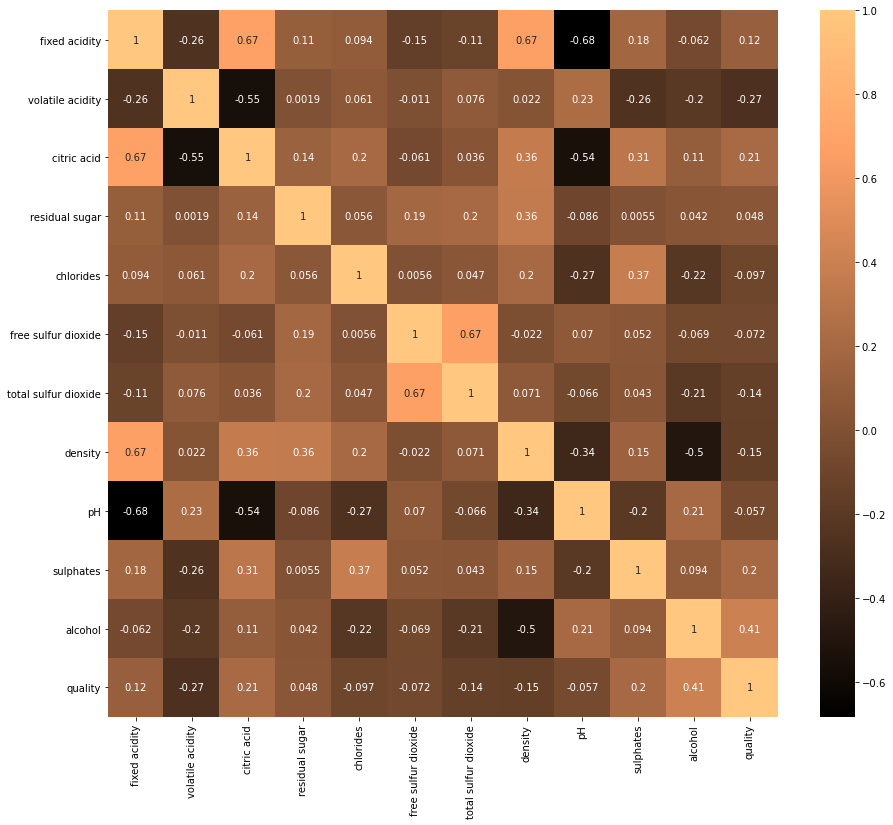

In [335]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),cmap='copper',annot=True)
plt.show()

We can see that our target variable has bad correlation with "residual sugar",'Free sulphur dioxide','pH','fixed acidity','chlorides'.But it has good correlation with "alcohol" and 'Volatile acidity'.

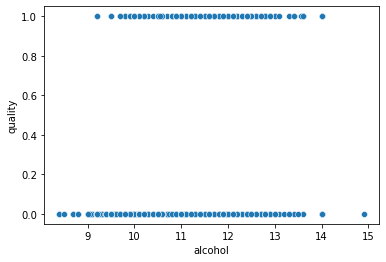

In [336]:
sns.scatterplot(df['alcohol'],df['quality'])
plt.show()

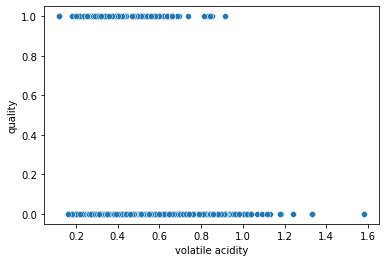

In [337]:
sns.scatterplot(df['volatile acidity'],df['quality'])
plt.show()

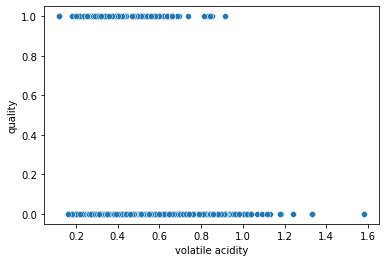

In [338]:
sns.scatterplot(df['volatile acidity'],df['quality'])
plt.show()

In [339]:
dfs=pd.DataFrame(df,columns=["alcohol","volatile acidity","quality"])

In [340]:
dfs

,alcohol,volatile acidity,quality
0,9.4,0.700,0
1,9.8,0.880,0
2,9.8,0.760,0
3,9.8,0.280,0
4,9.4,0.700,0
...,...,...,...
1594,10.5,0.600,0
1595,11.2,0.550,0
1596,11.0,0.510,0
1597,10.2,0.645,0


**Removing Outliers**

In [341]:
z=np.abs(zscore(dfs))

In [342]:
threshold=3
np.where(z>3)

(array([  38,  120,  126,  127,  142,  144,  199,  467,  588,  652,  672,
         690,  724,  821, 1269, 1270, 1299, 1312], dtype=int64),
 array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64))

In [343]:
df_new=dfs[(z<3).all(axis=1)]

In [344]:
df_new

,alcohol,volatile acidity,quality
0,9.4,0.700,0
1,9.8,0.880,0
2,9.8,0.760,0
3,9.8,0.280,0
4,9.4,0.700,0
...,...,...,...
1594,10.5,0.600,0
1595,11.2,0.550,0
1596,11.0,0.510,0
1597,10.2,0.645,0


In [345]:
print("Data loss:",(1599-1581)*100/1599,"%")

Data loss: 1.125703564727955 %


<AxesSubplot:>

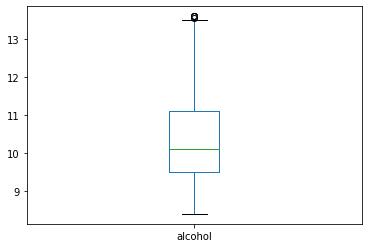

In [346]:
df_new['alcohol'].plot.box()

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

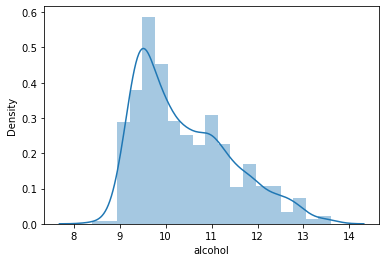

In [347]:
sns.distplot(df_new['alcohol'])

In [348]:
df_new['alcohol'].skew()

0.768227120276279

In [351]:
df_new['alcohol']=np.log(df_new['alcohol'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

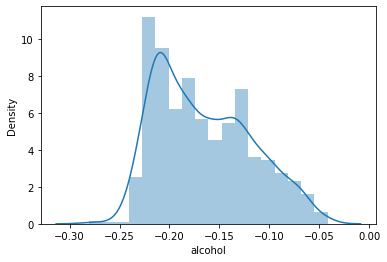

In [352]:
sns.distplot(df_new['alcohol'])

In [353]:
df_new['alcohol'].skew()

0.45360465046845266

<AxesSubplot:>

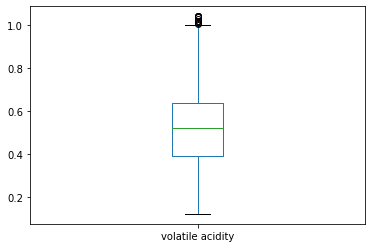

In [354]:
df_new['volatile acidity'].plot.box()

In [355]:
df_new['volatile acidity'].skew()

0.3599255182095733

Splitting the data into features and target

In [356]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [357]:
dsc=DecisionTreeClassifier()
for i in range(1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=i)
    dsc.fit(xtrain,ytrain)
    pred=dsc.predict(xtest)
    print('Accuracy Score:',accuracy_score(pred,ytest))
    print(f"Step {i} done!")

Accuracy Score: 0.8295019157088123
Step 0 done!
Accuracy Score: 0.842911877394636
Step 1 done!
Accuracy Score: 0.8467432950191571
Step 2 done!
Accuracy Score: 0.8697318007662835
Step 3 done!
Accuracy Score: 0.8601532567049809
Step 4 done!
Accuracy Score: 0.867816091954023
Step 5 done!
Accuracy Score: 0.8448275862068966
Step 6 done!
Accuracy Score: 0.8639846743295019
Step 7 done!
Accuracy Score: 0.8793103448275862
Step 8 done!
Accuracy Score: 0.8697318007662835
Step 9 done!
Accuracy Score: 0.8659003831417624
Step 10 done!
Accuracy Score: 0.8486590038314177
Step 11 done!
Accuracy Score: 0.8639846743295019
Step 12 done!
Accuracy Score: 0.8352490421455939
Step 13 done!
Accuracy Score: 0.8314176245210728
Step 14 done!
Accuracy Score: 0.8563218390804598
Step 15 done!
Accuracy Score: 0.8295019157088123
Step 16 done!
Accuracy Score: 0.8620689655172413
Step 17 done!
Accuracy Score: 0.8486590038314177
Step 18 done!
Accuracy Score: 0.8448275862068966
Step 19 done!
Accuracy Score: 0.85823754789272

Accuracy Score: 0.842911877394636
Step 180 done!
Accuracy Score: 0.8659003831417624
Step 181 done!
Accuracy Score: 0.8563218390804598
Step 182 done!
Accuracy Score: 0.867816091954023
Step 183 done!
Accuracy Score: 0.8582375478927203
Step 184 done!
Accuracy Score: 0.8448275862068966
Step 185 done!
Accuracy Score: 0.8409961685823755
Step 186 done!
Accuracy Score: 0.8563218390804598
Step 187 done!
Accuracy Score: 0.8371647509578544
Step 188 done!
Accuracy Score: 0.8639846743295019
Step 189 done!
Accuracy Score: 0.8467432950191571
Step 190 done!
Accuracy Score: 0.8620689655172413
Step 191 done!
Accuracy Score: 0.8659003831417624
Step 192 done!
Accuracy Score: 0.8333333333333334
Step 193 done!
Accuracy Score: 0.8716475095785441
Step 194 done!
Accuracy Score: 0.814176245210728
Step 195 done!
Accuracy Score: 0.8601532567049809
Step 196 done!
Accuracy Score: 0.842911877394636
Step 197 done!
Accuracy Score: 0.842911877394636
Step 198 done!
Accuracy Score: 0.8390804597701149
Step 199 done!
Accur

Accuracy Score: 0.8544061302681992
Step 352 done!
Accuracy Score: 0.8409961685823755
Step 353 done!
Accuracy Score: 0.8524904214559387
Step 354 done!
Accuracy Score: 0.8620689655172413
Step 355 done!
Accuracy Score: 0.8448275862068966
Step 356 done!
Accuracy Score: 0.8505747126436781
Step 357 done!
Accuracy Score: 0.8659003831417624
Step 358 done!
Accuracy Score: 0.8544061302681992
Step 359 done!
Accuracy Score: 0.8563218390804598
Step 360 done!
Accuracy Score: 0.8352490421455939
Step 361 done!
Accuracy Score: 0.8314176245210728
Step 362 done!
Accuracy Score: 0.8314176245210728
Step 363 done!
Accuracy Score: 0.8563218390804598
Step 364 done!
Accuracy Score: 0.8620689655172413
Step 365 done!
Accuracy Score: 0.8505747126436781
Step 366 done!
Accuracy Score: 0.8256704980842912
Step 367 done!
Accuracy Score: 0.8659003831417624
Step 368 done!
Accuracy Score: 0.8467432950191571
Step 369 done!
Accuracy Score: 0.867816091954023
Step 370 done!
Accuracy Score: 0.8486590038314177
Step 371 done!
A

Accuracy Score: 0.8582375478927203
Step 524 done!
Accuracy Score: 0.842911877394636
Step 525 done!
Accuracy Score: 0.8505747126436781
Step 526 done!
Accuracy Score: 0.8754789272030651
Step 527 done!
Accuracy Score: 0.8716475095785441
Step 528 done!
Accuracy Score: 0.8563218390804598
Step 529 done!
Accuracy Score: 0.8448275862068966
Step 530 done!
Accuracy Score: 0.8659003831417624
Step 531 done!
Accuracy Score: 0.8524904214559387
Step 532 done!
Accuracy Score: 0.8505747126436781
Step 533 done!
Accuracy Score: 0.8544061302681992
Step 534 done!
Accuracy Score: 0.8620689655172413
Step 535 done!
Accuracy Score: 0.8544061302681992
Step 536 done!
Accuracy Score: 0.8697318007662835
Step 537 done!
Accuracy Score: 0.8352490421455939
Step 538 done!
Accuracy Score: 0.8524904214559387
Step 539 done!
Accuracy Score: 0.8314176245210728
Step 540 done!
Accuracy Score: 0.8659003831417624
Step 541 done!
Accuracy Score: 0.8544061302681992
Step 542 done!
Accuracy Score: 0.8256704980842912
Step 543 done!
A

Accuracy Score: 0.8563218390804598
Step 690 done!
Accuracy Score: 0.8218390804597702
Step 691 done!
Accuracy Score: 0.8467432950191571
Step 692 done!
Accuracy Score: 0.8716475095785441
Step 693 done!
Accuracy Score: 0.867816091954023
Step 694 done!
Accuracy Score: 0.8352490421455939
Step 695 done!
Accuracy Score: 0.8582375478927203
Step 696 done!
Accuracy Score: 0.8850574712643678
Step 697 done!
Accuracy Score: 0.8563218390804598
Step 698 done!
Accuracy Score: 0.8314176245210728
Step 699 done!
Accuracy Score: 0.8544061302681992
Step 700 done!
Accuracy Score: 0.8524904214559387
Step 701 done!
Accuracy Score: 0.8486590038314177
Step 702 done!
Accuracy Score: 0.8697318007662835
Step 703 done!
Accuracy Score: 0.8601532567049809
Step 704 done!
Accuracy Score: 0.8524904214559387
Step 705 done!
Accuracy Score: 0.8563218390804598
Step 706 done!
Accuracy Score: 0.8371647509578544
Step 707 done!
Accuracy Score: 0.8601532567049809
Step 708 done!
Accuracy Score: 0.8773946360153256
Step 709 done!
A

Accuracy Score: 0.8524904214559387
Step 863 done!
Accuracy Score: 0.8505747126436781
Step 864 done!
Accuracy Score: 0.8659003831417624
Step 865 done!
Accuracy Score: 0.8582375478927203
Step 866 done!
Accuracy Score: 0.8409961685823755
Step 867 done!
Accuracy Score: 0.8486590038314177
Step 868 done!
Accuracy Score: 0.8486590038314177
Step 869 done!
Accuracy Score: 0.8486590038314177
Step 870 done!
Accuracy Score: 0.8544061302681992
Step 871 done!
Accuracy Score: 0.8563218390804598
Step 872 done!
Accuracy Score: 0.8524904214559387
Step 873 done!
Accuracy Score: 0.8199233716475096
Step 874 done!
Accuracy Score: 0.8486590038314177
Step 875 done!
Accuracy Score: 0.8831417624521073
Step 876 done!
Accuracy Score: 0.8237547892720306
Step 877 done!
Accuracy Score: 0.8371647509578544
Step 878 done!
Accuracy Score: 0.8563218390804598
Step 879 done!
Accuracy Score: 0.8275862068965517
Step 880 done!
Accuracy Score: 0.8524904214559387
Step 881 done!
Accuracy Score: 0.8544061302681992
Step 882 done!


In [358]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=697)
dsc.fit(xtrain,ytrain)
pred=dsc.predict(xtest)
print('Accuracy Score of testing data:',accuracy_score(pred,ytest)*100,"%")
print('Accuracy Score of training data:',accuracy_score(dsc.predict(xtrain),ytrain)*100,"%")

Accuracy Score of testing data: 88.31417624521073 %
Accuracy Score of training data: 96.88385269121812 %


In [359]:
confusion_matrix(pred,ytest)

array([[430,  31],
       [ 30,  31]], dtype=int64)

In [360]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       461
           1       0.50      0.51      0.50        61

    accuracy                           0.88       522
   macro avg       0.72      0.72      0.72       522
weighted avg       0.88      0.88      0.88       522



**Predicting the model using Logistic Regression**

In [361]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
Prediction=lr.predict(xtest)

In [362]:
print("Accuracy Score is:",accuracy_score(Prediction,ytest)*100,"%")

Accuracy Score is: 88.12260536398468 %


**The RUC and AUC Curve**

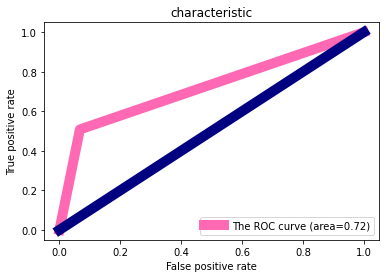

In [363]:
fpr,tpr,thresholds=roc_curve(pred,ytest)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='hotpink',lw=10,label='The ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="-")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [ ]:
filename='Red_wine_prediction.pkl'
pickle.dump(dsc,open(filename,'wb'))

**How good was Our model**

In [367]:
a=np.array(ytest)
predicted=np.array(pred)
df_com=pd.DataFrame({'Real':a,"predicted":predicted},index=range(len(a)))
df_com.head(7)

,Real,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
